<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_10_class_imbalance_RF_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Description of Class Imbalance

**Class imbalance** occurs when the number of instances in different classes of a dataset is significantly different. In other words, one class (the majority class) has many more instances than the other class (the minority class). This imbalance can cause issues in machine learning models, leading to biased and poor performance on the minority class.

### What Class Imbalance Is

1. **Uneven Distribution of Classes**:
   - Class imbalance refers to a situation where the classes in a dataset are not equally represented. For example, in a binary classification problem, you might have 90% of instances belonging to class 0 and only 10% to class 1.

2. **Skewed Class Representation**:
   - When the dataset's class distribution is skewed, it means that the machine learning model will encounter many more instances of the majority class than the minority class during training.

### Why Class Imbalance Matters

1. **Biased Model Predictions**:
   - Machine learning models trained on imbalanced datasets tend to be biased towards the majority class. This means that the model will often predict the majority class, leading to high accuracy but poor performance on the minority class.

2. **Poor Minority Class Performance**:
   - In an imbalanced dataset, the minority class might have too few instances for the model to learn its patterns effectively. This can result in poor recall and precision for the minority class, making the model unreliable for detecting instances of that class.

3. **Misleading Accuracy Metrics**:
   - In imbalanced datasets, accuracy can be a misleading metric. A model that always predicts the majority class can have high accuracy but will fail to identify any minority class instances correctly. More informative metrics such as recall, precision, F1-score, and area under the ROC curve (AUC-ROC) should be used to evaluate model performance.

### Strategies to Address Class Imbalance

1. **Class Weights**:
   - Assigning higher weights to the minority class in the loss function to ensure the model pays more attention to it.

2. **Resampling Techniques**:
   - **Oversampling**: Increasing the number of instances in the minority class by duplicating existing ones or generating new synthetic instances (e.g., SMOTE).
   - **Undersampling**: Reducing the number of instances in the majority class by randomly removing instances.




### Load & Preprocess, Resample

Preprocessing pipeline created successfully.


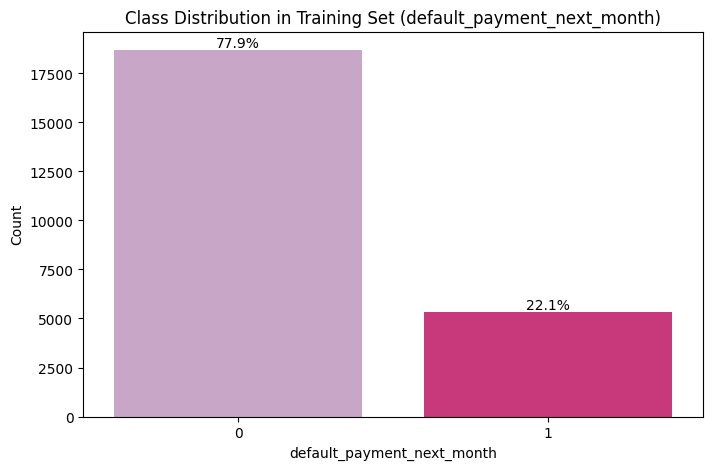

Classification Report for RandomForest with SMOTE:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.55      0.47      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000

Classification Report for RandomForest with Undersampling:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      4673
           1       0.45      0.62      0.52      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.75      0.76      6000

                              model      class    metric     value
0           RandomForest with SMOTE          0    recall  0.888080
1           RandomForest with SMOTE          0  f1-score  0.871574
2           RandomForest with SMO

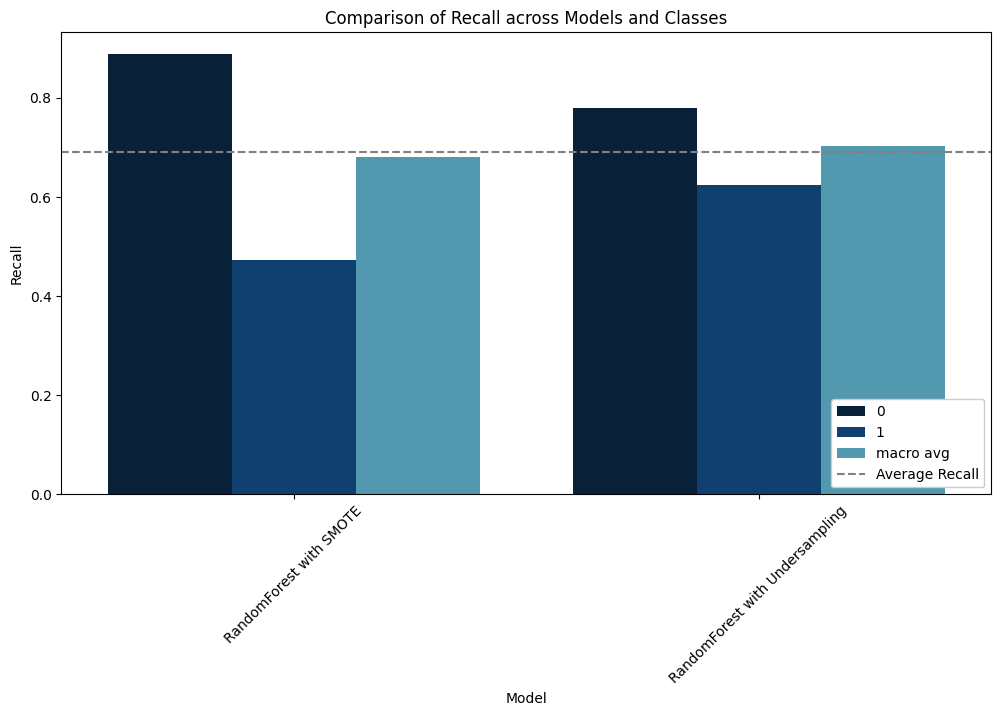

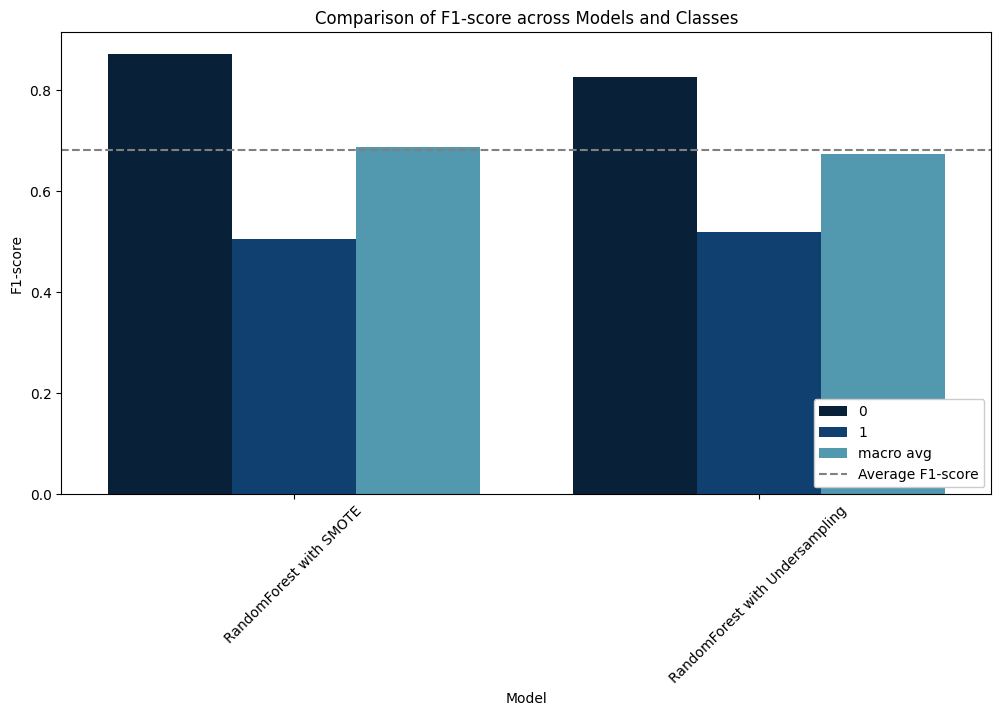

In [ ]:
# Import necessary functions and scripts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from data_utils import preprocess_data, split_data, create_preprocessing_pipeline, plot_class_distribution, evaluate_model
from resampling_utils import aggregate_reports, extract_key_metrics, plot_key_metrics

# Define your parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and Preprocess Data
data = preprocess_data(url, categorical_columns)
if data is not None:
    X_train, X_test, y_train, y_test = split_data(data, target=target)
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()
    pipeline = create_preprocessing_pipeline(numeric_features, categorical_features)
    plot_class_distribution(y_train, target)
else:
    print("Data preprocessing failed. Please check the URL and preprocessing steps.")

# Initialize an empty list to store all reports
all_reports = []

# Optimal threshold for RF model
optimal_threshold_rf = 0.25  # Replace with your identified threshold

# Define a function to apply the threshold and evaluate the model
def evaluate_model_with_threshold(pipeline, X_test, y_test, threshold, model_name):
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_prob >= threshold).astype(int)
    report = evaluate_model(pipeline, X_test, y_test, model_name)
    report['model'] = model_name
    report['threshold'] = threshold
    return report

# RandomForest with SMOTE
smote = SMOTE(random_state=42)
pipeline_with_rf_smote = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('smote', smote),
    ('model', RandomForestClassifier(random_state=42))
])
pipeline_with_rf_smote.fit(X_train, y_train)
report_rf_smote = evaluate_model_with_threshold(pipeline_with_rf_smote, X_test, y_test, optimal_threshold_rf, "RandomForest with SMOTE")
all_reports = aggregate_reports(all_reports, report_rf_smote)

# RandomForest with Undersampling
undersample = RandomUnderSampler(random_state=42)
pipeline_with_rf_undersample = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('undersample', undersample),
    ('model', RandomForestClassifier(random_state=42))
])
pipeline_with_rf_undersample.fit(X_train, y_train)
report_rf_undersample = evaluate_model_with_threshold(pipeline_with_rf_undersample, X_test, y_test, optimal_threshold_rf, "RandomForest with Undersampling")
all_reports = aggregate_reports(all_reports, report_rf_undersample)

# Extract and display the key metrics
desired_metrics = ['recall', 'f1-score']
desired_classes = ['0', '1', 'macro avg']
key_metrics_df = extract_key_metrics(all_reports, desired_metrics, desired_classes)
print(key_metrics_df)

# Plot key metrics
plot_key_metrics(key_metrics_df, desired_metrics, desired_classes)


In [ ]:
key_metrics_df

,model,class,metric,value
0,RandomForest with SMOTE,0,recall,0.888080
1,RandomForest with SMOTE,0,f1-score,0.871574
2,RandomForest with SMOTE,1,recall,0.472494
3,RandomForest with SMOTE,1,f1-score,0.506258
4,RandomForest with SMOTE,macro avg,recall,0.680287
5,RandomForest with SMOTE,macro avg,f1-score,0.688916
6,RandomForest with Undersampling,0,recall,0.779371
7,RandomForest with Undersampling,0,f1-score,0.826506
8,RandomForest with Undersampling,1,recall,0.624717
9,RandomForest with Undersampling,1,f1-score,0.520238


### Analysis of Results

Based on the performance metrics for the RandomForest model using SMOTE and Undersampling, here’s an analysis focusing on the key metrics: recall for class 1, F1-score for class 1, and macro average recall and F1-score.

#### Summary of Key Metrics:

1. **Recall for Class 1**: Indicates the ability of the model to correctly identify true positives (loan defaults).
2. **F1-Score for Class 1**: Balances precision and recall, providing a single metric for model performance on the minority class.
3. **Macro Average Recall**: Average recall across both classes, providing an overall sense of model sensitivity.
4. **Macro Average F1-Score**: Average F1-score across both classes, providing a balanced measure of model performance.


### Key Observations:

1. **Recall for Class 1**:
   - **RandomForest with Undersampling**: 0.624717
   - **RandomForest with SMOTE**: 0.472494
   - **Observation**: The RandomForest model with Undersampling has a significantly higher recall for class 1, indicating it is better at identifying loan defaults.

2. **F1-Score for Class 1**:
   - **RandomForest with Undersampling**: 0.520238
   - **RandomForest with SMOTE**: 0.506258
   - **Observation**: The F1-score for class 1 is slightly higher for the RandomForest model with Undersampling, showing a better balance between precision and recall for the minority class.

3. **Macro Average Recall**:
   - **RandomForest with Undersampling**: 0.702044
   - **RandomForest with SMOTE**: 0.680287
   - **Observation**: The macro average recall is higher for the RandomForest model with Undersampling, indicating better overall sensitivity.

4. **Macro Average F1-Score**:
   - **RandomForest with SMOTE**: 0.688916
   - **RandomForest with Undersampling**: 0.673372
   - **Observation**: The macro average F1-score is slightly higher for the RandomForest model with SMOTE, suggesting a better overall balance between precision and recall across both classes.

### Recommendations:

1. **Priority on Recall for Class 1**:
   - **Best Option**: RandomForest with Undersampling (Recall for class 1: 0.624717)
   - **Reason**: This model has a higher recall for class 1, which is critical for identifying loan defaults.

2. **Considering Overall Performance**:
   - **Secondary Option**: RandomForest with SMOTE (Macro average F1-score: 0.688916)
   - **Reason**: Although it has a lower recall for class 1, it offers a better overall balance between precision and recall.

### Conclusion:

Given the priority on recall for class 1 and the need to maintain a high F1 macro score, **RandomForest with Undersampling** is the recommended model due to its higher recall for class 1. This model is more effective at identifying loan defaults, aligning with your business objective of minimizing false negatives. If overall performance balance is also a significant consideration, **RandomForest with SMOTE** remains a viable option due to its slightly higher macro average F1-score.

### Description of Class Weights

**Class weights** are a technique used in machine learning to handle imbalanced datasets. Imbalanced datasets occur when the number of instances in different classes is significantly different, which can lead to models that are biased towards the majority class. Class weights assign different weights to different classes to balance their impact on the model during training.

### What Class Weights Do

1. **Adjust the Importance**:
   - Class weights increase the importance of the minority class in the loss function used to train the model. By giving higher weights to the minority class, the model is penalized more for misclassifying minority class instances.

2. **Modify the Loss Function**:
   - The loss function is adjusted so that errors in the minority class are given more weight. This means that the model will focus more on correctly classifying the minority class, which helps to improve recall and precision for that class.

### Why Class Weights Matter

1. **Improving Model Performance on Minority Class**:
   - In imbalanced datasets, the model might perform well overall but poorly on the minority class. Class weights help ensure that the model pays more attention to the minority class, improving metrics such as recall and precision for that class.

2. **Reducing Bias**:
   - Without class weights, models can become biased towards the majority class, leading to poor generalization and unfair predictions. Class weights help mitigate this bias, leading to fairer and more balanced models.

3. **Enhancing Recall for Critical Applications**:
   - In many real-world applications, recall for the minority class is crucial. For example, in medical diagnostics, fraud detection, and loan default prediction, missing instances of the minority class (false negatives) can have serious consequences. Class weights help to enhance recall, reducing the risk of missing critical instances.

### When to Use Class Weights

1. **Imbalanced Datasets**:
   - Class weights are particularly useful when dealing with imbalanced datasets where the number of instances in one class is much higher than the other(s).

2. **Critical Minority Class**:
   - When the minority class represents critical cases that should not be overlooked, such as detecting diseases, identifying fraud, or predicting rare events.

3. **During Initial Model Training**:
   - Class weights can be used during the initial stages of model training to quickly address class imbalance without the need for complex resampling techniques.



### Evaluate Models with Class Weights

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a weighted Random Forest model
rf_model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)

Preprocessing pipeline created successfully.


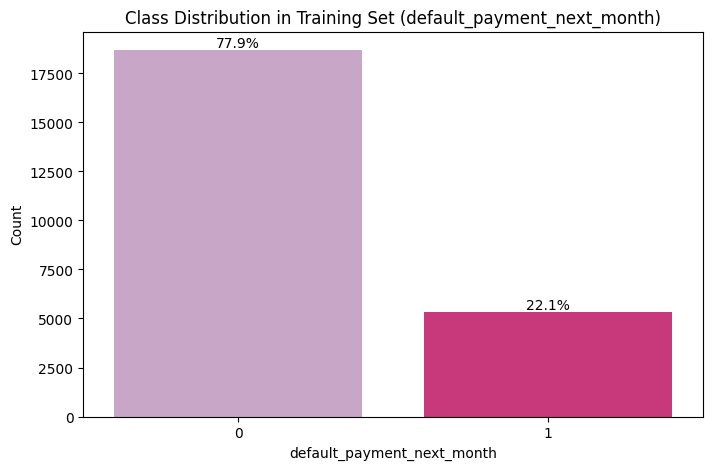

Classification Report for RandomForest with Class Weights:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

                             model      class    metric     value
0  RandomForest with Class Weights          0    recall  0.946501
1  RandomForest with Class Weights          0  f1-score  0.888153
2  RandomForest with Class Weights          1    recall  0.348907
3  RandomForest with Class Weights          1  f1-score  0.453922
4  RandomForest with Class Weights  macro avg    recall  0.647704
5  RandomForest with Class Weights  macro avg  f1-score  0.671037


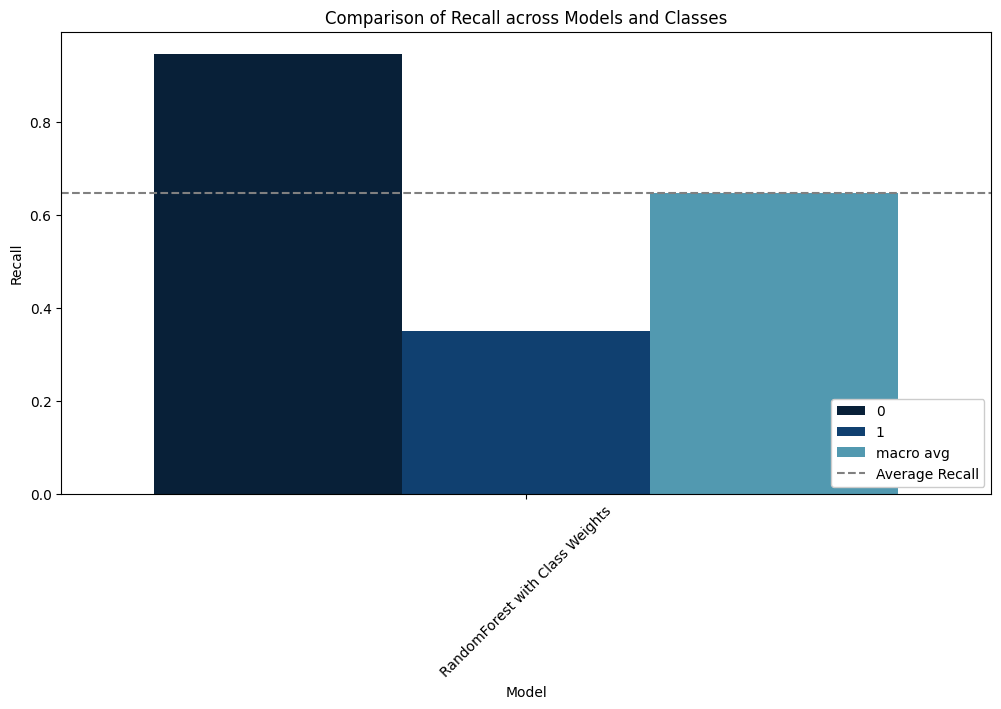

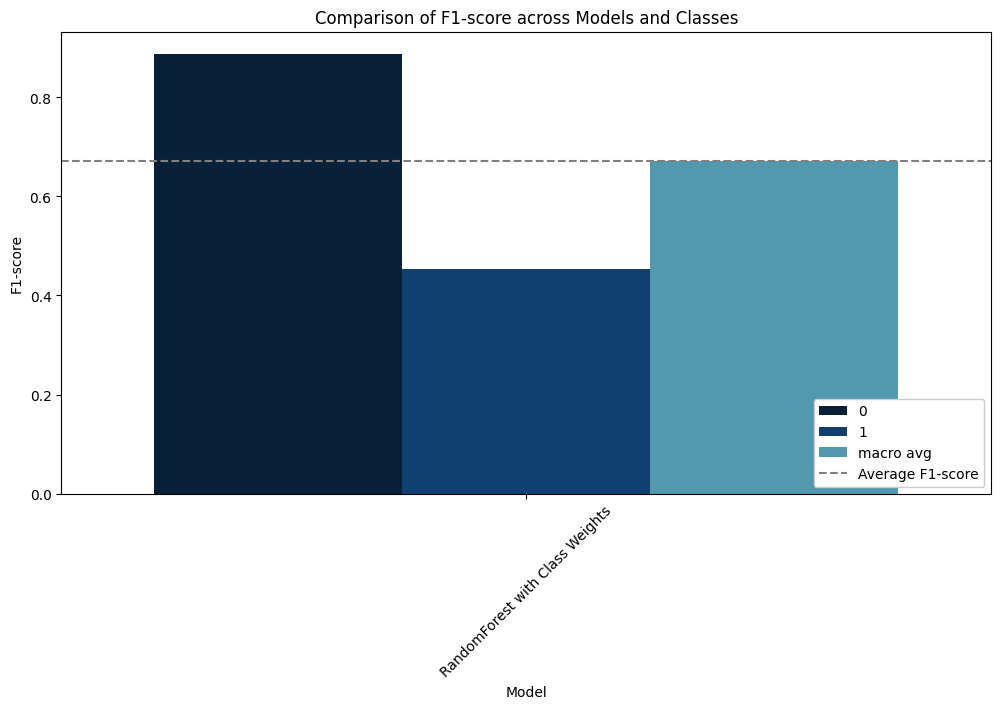

In [ ]:
# Define a function to evaluate the model with class weights
def evaluate_model_with_threshold(pipeline, X_test, y_test, threshold, model_name):
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_prob >= threshold).astype(int)
    report = evaluate_model(pipeline, X_test, y_test, model_name)
    report['model'] = model_name
    report['threshold'] = threshold
    return report

# Define your parameters
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and Preprocess Data
data = preprocess_data(url, categorical_columns)
if data is not None:
    X_train, X_test, y_train, y_test = split_data(data, target=target)
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()
    pipeline = create_preprocessing_pipeline(numeric_features, categorical_features)
    plot_class_distribution(y_train, target)
else:
    print("Data preprocessing failed. Please check the URL and preprocessing steps.")

# Initialize an empty list to store all reports
all_reports = []

# Optimal threshold for RF model
optimal_threshold_rf = 0.25  # Replace with your identified threshold

# RandomForest with Class Weights
pipeline_with_rf_weighted = ImbPipeline(steps=[
    ('preprocessor', pipeline.named_steps['preprocessor']),
    ('model', rf_model_weighted)
])
pipeline_with_rf_weighted.fit(X_train, y_train)
report_rf_weighted = evaluate_model_with_threshold(pipeline_with_rf_weighted, X_test, y_test, optimal_threshold_rf, "RandomForest with Class Weights")
all_reports = aggregate_reports(all_reports, report_rf_weighted)

# Extract and display the key metrics
desired_metrics = ['recall', 'f1-score']
desired_classes = ['0', '1', 'macro avg']
key_metrics_df = extract_key_metrics(all_reports, desired_metrics, desired_classes)
print(key_metrics_df)

# Plot key metrics
plot_key_metrics(key_metrics_df, desired_metrics, desired_classes)


#### Result Table

In [ ]:
key_metrics_df

,model,class,metric,value
0,RandomForest with Class Weights,0,recall,0.946501
1,RandomForest with Class Weights,0,f1-score,0.888153
2,RandomForest with Class Weights,1,recall,0.348907
3,RandomForest with Class Weights,1,f1-score,0.453922
4,RandomForest with Class Weights,macro avg,recall,0.647704
5,RandomForest with Class Weights,macro avg,f1-score,0.671037


### Analysis of Results

The results for the RandomForest model with the key metrics focusing on recall for class 1, F1-score for class 1, and macro average recall and F1-score.


### Key Observations:

1. **Recall for Class 1**:
   - **RandomForest with Class Weights**: 0.348907
   - **Observation**: The recall for class 1 is quite low, indicating that the model is not very effective at identifying loan defaults despite using class weights.

2. **F1-Score for Class 1**:
   - **RandomForest with Class Weights**: 0.453922
   - **Observation**: The F1-score for class 1 is also relatively low, reflecting a poor balance between precision and recall for the minority class.

3. **Macro Average Recall**:
   - **RandomForest with Class Weights**: 0.647704
   - **Observation**: The macro average recall is moderate, indicating overall sensitivity across both classes but weighted heavily by the performance on the majority class.

4. **Macro Average F1-Score**:
   - **RandomForest with Class Weights**: 0.671037
   - **Observation**: The macro average F1-score is moderate, showing an average balance between precision and recall across both classes.

### Recommendations:

1. **Priority on Recall for Class 1**:
   - **RandomForest with Undersampling**: Recall for class 1 is 0.624717
   - **Observation**: The RandomForest model with undersampling has the highest recall for class 1, making it the most effective model for identifying loan defaults.

2. **Considering Overall Performance**:
   - **RandomForest with SMOTE**: Provides a more balanced performance with a macro average recall of 0.680287 and macro average F1-score of 0.688916.
   - **Observation**: If overall performance and balance across classes are important, the RandomForest with SMOTE is a viable option.

3. **Class Weights**:
   - **Observation**: While class weights can help address imbalance, in this case, they did not significantly improve the recall for class 1 and resulted in a lower recall compared to other methods.

### Conclusion:

Based on the results, **RandomForest with Undersampling** is the recommended model due to its higher recall for class 1, which is critical for identifying loan defaults. This model aligns best with the objective of minimizing false negatives (missed loan defaults).

If maintaining a balanced performance across all metrics is also a priority, **RandomForest with SMOTE** is a strong alternative due to its balanced macro average metrics.

### Next Steps:

- **Finalize Model Selection**: Based on the analysis, select RandomForest with Undersampling as the primary model.
- **Hyperparameter Tuning**: Perform hyperparameter tuning on the selected model to further optimize its performance.
- **Deployment**: Once the model is tuned and finalized, proceed with deployment and continuous monitoring to ensure consistent performance.

By following these steps, you can ensure that the selected model meets your performance criteria and aligns with your business objectives.

### Summary of Optimal Values Identified

#### Optimal Model and Threshold:

- **Model**: RandomForest with Undersampling
- **Optimal Threshold**: 0.25

#### Key Performance Metrics:

1. **RandomForest with Undersampling**:
   - **Class 0**:
     - Recall: 0.779371
     - F1-Score: 0.826506
   - **Class 1**:
     - Recall: 0.624717
     - F1-Score: 0.520238
   - **Macro Average**:
     - Recall: 0.702044
     - F1-Score: 0.673372

2. **Comparison Models**:

   - **RandomForest with SMOTE**:
     - **Class 0**:
       - Recall: 0.888080
       - F1-Score: 0.871574
     - **Class 1**:
       - Recall: 0.472494
       - F1-Score: 0.506258
     - **Macro Average**:
       - Recall: 0.680287
       - F1-Score: 0.688916

   - **RandomForest with Class Weights**:
     - **Class 0**:
       - Recall: 0.946501
       - F1-Score: 0.888153
     - **Class 1**:
       - Recall: 0.348907
       - F1-Score: 0.453922
     - **Macro Average**:
       - Recall: 0.647704
       - F1-Score: 0.671037

### Key Observations:

1. **Recall for Class 1**:
   - **Best Value**: 0.624717 (RandomForest with Undersampling)
   - **Observation**: The RandomForest model with undersampling has the highest recall for class 1, making it the most effective model for identifying loan defaults.

2. **F1-Score for Class 1**:
   - **Best Value**: 0.520238 (RandomForest with Undersampling)
   - **Observation**: The F1-score for class 1 is highest for the RandomForest model with undersampling, reflecting a good balance between precision and recall.

3. **Macro Average Recall**:
   - **Best Value**: 0.702044 (RandomForest with Undersampling)
   - **Observation**: The macro average recall is highest for the RandomForest model with undersampling, indicating better overall sensitivity across both classes.

4. **Macro Average F1-Score**:
   - **Best Value**: 0.688916 (RandomForest with SMOTE)
   - **Observation**: The macro average F1-score is highest for the RandomForest model with SMOTE, suggesting a better overall balance between precision and recall across both classes.

### Recommendations:

1. **Primary Model**: **RandomForest with Undersampling**
   - **Reason**: This model provides the highest recall for class 1, which is crucial for identifying loan defaults.

2. **Secondary Model**: **RandomForest with SMOTE**
   - **Reason**: This model offers a balanced performance with the highest macro average F1-score, making it a strong alternative if overall performance is also a priority.

### Next Steps:

1. **Hyperparameter Tuning**: Perform hyperparameter tuning on the RandomForest with Undersampling model to further optimize its performance.
2. **Deployment**: Once the model is tuned and finalized, proceed with deployment and continuous monitoring to ensure consistent performance.
3. **Documentation and Reporting**: Document the process, decisions, and results for future reference and reporting.

By following these steps and using the identified optimal values, you can ensure that the selected model meets your performance criteria and aligns with your business objectives.

#### Write Data Utils Script

In [ ]:
script_content = r'''
# data_utils.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset from a URL
def load_data_from_url(url):
    """
    Load the dataset from a specified URL.

    Parameters:
    - url: str, URL of the dataset

    Returns:
    - pd.DataFrame, loaded dataset
    """
    try:
        df = pd.read_excel(url, header=1)
    except Exception as e:
        print(f"Error loading data from URL: {e}")
        return None
    return df

# Clean column names
def clean_column_names(df):
    """
    Clean the column names by converting to lowercase and replacing spaces with underscores.

    Parameters:
    - df: pd.DataFrame, input dataframe

    Returns:
    - pd.DataFrame, dataframe with cleaned column names
    """
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

# Remove the 'id' column
def remove_id_column(df):
    """
    Remove the 'id' column if it exists.

    Parameters:
    - df: pd.DataFrame, input dataframe

    Returns:
    - pd.DataFrame, dataframe without 'id' column
    """
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

# Rename columns (pay_0 not in dataset)
def rename_columns(df):
    """
    Rename specific columns based on a predefined dictionary.

    Parameters:
    - df: pd.DataFrame, input dataframe

    Returns:
    - pd.DataFrame, dataframe with renamed columns
    """
    rename_dict = {
        'pay_0': 'pay_1'
    }
    df = df.rename(columns=rename_dict)
    return df

# Convert specified columns to categorical type
def convert_categorical(df, categorical_columns):
    """
    Convert specified columns to categorical type.

    Parameters:
    - df: pd.DataFrame, input dataframe
    - categorical_columns: list of str, columns to convert to categorical type

    Returns:
    - pd.DataFrame, dataframe with converted columns
    """
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

# Split the data into training and testing sets
def split_data(df, target):
    """
    Split the data into training and testing sets.

    Parameters:
    - df: pd.DataFrame, input dataframe
    - target: str, name of the target column

    Returns:
    - tuple, (X_train, X_test, y_train, y_test)
    """
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

def preprocess_data(url, categorical_columns):
    """
    Load and preprocess the data.

    Parameters:
    - url: str, URL of the dataset
    - categorical_columns: list of str, columns to convert to categorical type

    Returns:
    - pd.DataFrame, preprocessed data
    """
    # Load the dataset
    data = load_data_from_url(url)

    if data is None:
        return None

    # Clean column names
    data = clean_column_names(data)

    # Remove the 'id' column
    data = remove_id_column(data)

    # Rename columns
    data = rename_columns(data)

    # Convert specified columns to categorical type
    data = convert_categorical(data, categorical_columns)

    return data

# Plot class balance in the training set with ratio annotations
def plot_class_distribution(y_train, target):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='PuRd')
    plt.title(f'Class Distribution in Training Set ({target})')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)  # Turn off the legend

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

def create_preprocessing_pipeline(numeric_features, categorical_features):
    """
    Create a preprocessing pipeline for numeric and categorical features.

    Parameters:
    - numeric_features: list of str, names of numeric features
    - categorical_features: list of str, names of categorical features

    Returns:
    - sklearn.pipeline.Pipeline, the complete preprocessing pipeline
    """
    # Define the transformers for numerical and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine the transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Create the full pipeline with preprocessing and a placeholder for the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
        # You can add your model here, e.g., ('model', RandomForestClassifier())
    ])

    print("Preprocessing pipeline created successfully.")
    return pipeline

def add_model_to_pipeline(pipeline, model):
    """
    Add a model to the preprocessing pipeline.

    Parameters:
    - pipeline: sklearn.pipeline.Pipeline, the preprocessing pipeline
    - model: sklearn estimator, the model to add to the pipeline

    Returns:
    - sklearn.pipeline.Pipeline, the complete pipeline with the model added
    """
    return Pipeline(steps=pipeline.steps + [('model', model)])

def evaluate_model(pipeline, X_test, y_test, model_name):
    """
    Evaluate the model using the test data.

    Parameters:
    - pipeline: sklearn.pipeline.Pipeline, the complete pipeline with preprocessing and model
    - X_test: pd.DataFrame or np.ndarray, the test features
    - y_test: pd.Series or np.ndarray, the test labels
    - model_name: str, name of the model

    Returns:
    - dict, the classification report with the model name included
    """
    y_pred = pipeline.predict(X_test)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_dict['model'] = model_name
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    return report_dict

def hyperparameter_tuning(pipeline, param_grid, X_train, y_train):
    """
    Perform hyperparameter tuning using GridSearchCV.

    Parameters:
    - pipeline: sklearn.pipeline.Pipeline, the complete pipeline with preprocessing and model
    - param_grid: dict, the parameter grid for GridSearchCV
    - X_train: pd.DataFrame or np.ndarray, the training features
    - y_train: pd.Series or np.ndarray, the training labels

    Returns:
    - sklearn estimator, the best estimator found by GridSearchCV
    """
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:\n", grid_search.best_params_)
    return grid_search.best_estimator_

def create_weighted_model(model_type, class_weight='balanced', random_state=42):
    """
    Create a model with class weights.

    Parameters:
    - model_type: str, type of the model ('logistic_regression' or 'random_forest')
    - class_weight: dict or 'balanced', class weights
    - random_state: int, random state for reproducibility

    Returns:
    - sklearn estimator, the model with class weights
    """
    if model_type == 'logistic_regression':
        model = LogisticRegression(class_weight=class_weight, max_iter=500, random_state=random_state)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(class_weight=class_weight, random_state=random_state)
    else:
        raise ValueError("Unsupported model type. Use 'logistic_regression' or 'random_forest'.")

    return model

'''

# Write the script to a file
with open("data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_utils.py")

# Reload script to make functions available for use
import importlib
import data_utils
importlib.reload(data_utils)

from data_utils import (load_data_from_url, clean_column_names, remove_id_column,
                        rename_columns, convert_categorical, preprocess_data, split_data, plot_class_distribution,
                        create_preprocessing_pipeline, add_model_to_pipeline, evaluate_model,
                        hyperparameter_tuning, create_weighted_model)


Script successfully written to data_utils.py


#### Write Resampling Utils Script

In [ ]:
script_content = r'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate the model and return the classification report as a dictionary.

    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels
    - model_name: str, name of the model

    Returns:
    - dict, classification report dictionary
    """
    report_dict = classification_report(y_true, y_pred, output_dict=True)

    # Print the classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred))

    # Add model name to the dictionary
    report_dict['model'] = model_name

    return report_dict

def aggregate_reports(reports_list, new_report):
    """
    Aggregate classification reports into a list.

    Parameters:
    - reports_list: list, list of classification reports
    - new_report: dict, new classification report to add

    Returns:
    - list, updated list of classification reports
    """
    reports_list.append(new_report)
    return reports_list

def extract_key_metrics(reports_list, metrics, classes):
    """
    Extract key metrics from the aggregated classification reports.

    Parameters:
    - reports_list: list, list of classification reports
    - metrics: list of str, metrics to extract
    - classes: list of str, classes to include in the comparison

    Returns:
    - pd.DataFrame, DataFrame with the selected metrics
    """
    extracted_metrics = []

    for report in reports_list:
        model_name = report['model']
        for cls in classes:
            for metric in metrics:
                metric_value = report[cls][metric]
                extracted_metrics.append({
                    'model': model_name,
                    'class': cls,
                    'metric': metric,
                    'value': metric_value
                })

    return pd.DataFrame(extracted_metrics)

def plot_key_metrics(metrics_df, metrics, classes):
    """
    Plot key metrics from the aggregated classification reports.

    Parameters:
    - metrics_df: pd.DataFrame, DataFrame containing the extracted metrics
    - metrics: list of str, metrics to plot (e.g., ['recall', 'f1-score'])
    - classes: list of str, classes to include in the plot

    Returns:
    - None
    """
    primary_metric = metrics[0]
    secondary_metric = metrics[1] if len(metrics) > 1 else None

    for metric in metrics:
        plt.figure(figsize=(12, 6))

        # Filter the DataFrame for the current metric
        metric_df = metrics_df[metrics_df['metric'] == metric]

        # Plot the bar plot
        sns.barplot(data=metric_df, x='model', y='value', hue='class', palette='ocean')
        plt.title(f'Comparison of {metric.capitalize()} across Models and Classes')
        plt.xlabel('Model')
        plt.ylabel(metric.capitalize())
        plt.legend(title='Class', loc='lower right', framealpha=1.0)
        plt.xticks(rotation=45)

        # Calculate and plot the average line for the primary and secondary metrics
        if metric == primary_metric or metric == secondary_metric:
            avg_metric_value = metric_df['value'].mean()
            plt.axhline(avg_metric_value, color='0.5', linestyle='--', label=f'Average {metric.capitalize()}')
            plt.legend(loc='lower right', framealpha=1.0)

        plt.show()

def evaluate_thresholds(y_true, y_pred_prob, thresholds, model_name):
    results = []
    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        results.append({'threshold': threshold, 'precision': precision, 'recall': recall, 'f1': f1})

    results_df = pd.DataFrame(results)

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
    plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
    plt.plot(results_df['threshold'], results_df['f1'], label='F1 Score')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Precision, Recall, and F1 Score for Different Thresholds ({model_name})')
    plt.legend()
    plt.show()

    return results_df

'''

# Write the script to a file
with open("resampling_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to resampling_utils.py")

# Reload script to make functions available for use
import importlib
import resampling_utils
importlib.reload(resampling_utils)

from resampling_utils import evaluate_model, aggregate_reports, extract_key_metrics, plot_key_metrics, evaluate_thresholds


Script successfully written to resampling_utils.py
